<a href="https://colab.research.google.com/github/janorena/modelado-y-simulacion/blob/master/Bifurcaciones_ejercicios_capitulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jorge Andrés Noreña García - 816543

In [161]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time
import math

# Bifurcación tipo silla-nodo

En matemática, una bifurcación silla-nodo (o tangente, o en inglés “saddle-node”, "tangent, o "fold") es una bifurcación local o global de una ecuación diferencial ordinaria en la que dos puntos fijos (o equilibrios, o críticos) de un sistema dinámico chocan y se aniquilan entre ellos mismo. La frase “bifurcación silla-nodo” se utiliza con frecuencia en referencia a sistemas dinámicos continuos. En los sistemas discretos, la misma bifurcación tiene el nombre (“bifurcación de fold”). Bifurcaciones silla-nodo son la forma genérica que el número de soluciones de equilibrio de un sistema dinámicos cambia cuando algún parámetro es variado. 

Si la ecuación diferencial ordinaria $\frac{\partial x}{\partial t} = f(x, c)$, descrita por un solo parámetro $c$ de la función $f(x, c)$, con $c$ siendo un miembro o elemento de los números reales $(C \in R)$, y $f(x, c)$ es una función a lo cual:

$$f(0, c_0)=0$$ 

además, 

$$ \frac{\partial f}{\partial x} (0,c_0) \quad \frac{\partial^2 f}{\partial x^2} > 0, \quad \frac{\partial f}{\partial c}(0, c_0) >0$$ 

Entonces existe un intervalo entre $(c_1, 0)$ y $(0, c_2)$ con $e>0$ donde:

1. Si $c \in (c_1,0)$, entonces $f_c(x)$ tiene dos puntos fijos  en $(e, -e)$ con el positivo siendo **no estable** y el negativo **estable**.
2. Si $c \in (0,c_2)$, entonces $f_c(x)$ tiene dos puntos fijos  en $(e, -e)$

## 3.1.1) $\dot{x}=1+rx+x^2$



*   Existe un punto fijo estable e inestable como $|r| \geq 2$. Para ver esto, establezca $\dot{x}=1+r x+x^{2}=0$ para analizar la curva de los puntos fijos. Reorganizar los términos da como resultado $x_{1,2}=-\frac{r}{2} \pm \sqrt{\frac{r^{2}}{4}-1}$ El argumento de la raíz cuadrada tiene que ser no negativo que se cumple para $|r|\geq2. $ Finalmente, ambas funciones describen la curva del diagrama de bifurcación. Las curvas se acercan a $ f_ {1} = - r $ y $ f_{2}=0$ como $|r|\rightarrow\infty$




[-sqrt(21)/2 + 5/2, sqrt(21)/2 + 5/2]


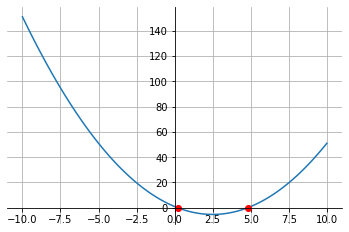

In [162]:
x=np.linspace(-10,10,100)
r=-5
x_dot=1+r*x+x**2
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


plt.plot(x,x_dot)
plt.grid()

x=sp.symbols('x')
x_dot1=1+r*x+x**2
roots=sp.solve(x_dot1)
print(roots)
for j in range(len(roots)):
  plt.plot(roots[j],0,'ro')

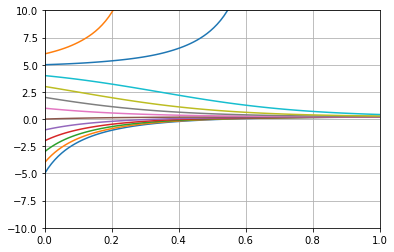

In [163]:
def fun (t,x,r,b):
  return 1+r*x+x**b

r,b=-5,2

ti=0; tf=1; dt=100
tspam=[ti, tf]
t=np.linspace(ti,tf,dt)
for x0 in np.arange(-5,7,1):
  sol=solve_ivp(fun,tspam,[x0],args=(r,b),t_eval=t)
  plt.plot(sol.t, sol.y[0])

plt.axis([ti, tf, -10, 10])
plt.grid()

* cuando los valoresse alejan mucho del 3 tiende a entrar en inestabilidad.

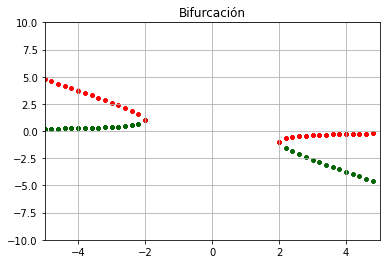

In [164]:
ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
plt.title('Bifurcación')
plt.axis([-5, 5, -10, 10])
plt.grid()

* es estable para valores mayores que do y menores que -2

## 3.1.2) $\dot{x}=r-cosh(x)$

* Un punto fijo estable e inestable existe como $r\geq1.$ Establecemos $\dot{x}=r-\cosh(x)=0$ para analizar la curva de los puntos fijos. Al reorganizar los términos se obtiene $x_{1,2}=\pm\operatorname{arcosh}(r)$ Mientras que $\cosh(x)$ nunca puede ser menor que $1,$ arcosh $(r)$ debe tener un argumento $r\geq1$ $x_{2}=-\operatorname{arcosh}(r)$ es el punto fijo inestable.
* Todos excepto abajo a la derecha: espacio de fase de $ \dot{x}= $ $ r-\cosh(x), $ arriba a la izquierda: $ r = 0, $ arriba a la derecha: $ r = 1 $ abajo a la izquierda: $ r = 2 , $ abajo a la derecha: diagrama de bifurcación de $ \dot{x} = r-\cosh (x) $

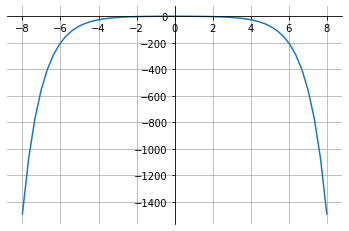

In [165]:
r = 1
x = np.linspace(-8,8)
dx = r-np.cosh(x)

# Dibuja el gráfico auxiliar x vs. dx

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.plot(x,dx)
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cosh
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cosh
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cosh
  


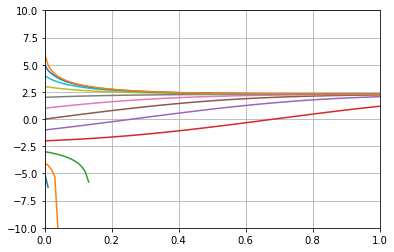

In [166]:
def fun (t,x,r,b):
  return r-np.cosh(x)

r,b=5,2

ti=0; tf=1; dt=100
tspam=[ti, tf]
t=np.linspace(ti,tf,dt)
for x0 in np.arange(-5,7,1):
  sol=solve_ivp(fun,tspam,[x0],args=(r,b),t_eval=t)
  plt.plot(sol.t, sol.y[0])

plt.axis([ti, tf, -10, 10])
plt.grid()

* cuando los valoresse alejan mucho del 0 hacia el negativo tiende a entrar en inestabilidad.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cosh
  


<Figure size 1800x360 with 0 Axes>

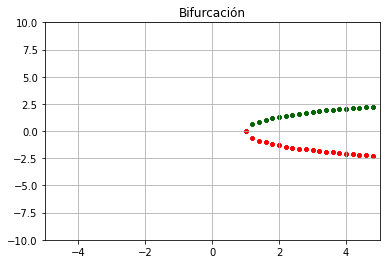

<Figure size 1800x360 with 0 Axes>

In [167]:
ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')

plt.axis([-5, 5, -10, 10])
plt.grid()
plt.title('Bifurcación')
plt.axis([-5,5,-10,10])
plt.figure(figsize=(20,4),dpi=90)

* para valores menores a 1 es inestable, para valores mayores a uno es estable

## 3.1.3) $\dot{x}=r+x-ln(1+x)$

* Si bien resolver $ \dot{x} = 0 $ para $ x $ es problemático, resolver $ r $ da como resultado $ r = \ ln (1 + x) + x. \ ln (1 + x) $ tiene que tener valores $ x\geq-1. $ Si $ x\rightarrow-1 $ o $ x\rightarrow\infty, r\rightarrow-\infty. $ Entonces, no hay puntos para $ r> 0. $ Para $ r<0, $ el punto fijo que se aproxima a $ x = -1 $ es estable, el otro inestable.
* Todos excepto abajo a la derecha: Espacio de fase de $ \dot{x} = r + $ $ x- \ln(1 + x), $ arriba a la izquierda: $ r = -1, $ arriba a la derecha: $ r = 0 $ abajo a la izquierda: $ r = 1, $ abajo a la derecha: diagrama de bifurcación de $ \dot{x} = r + x-\ln(1 + x) $


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


[-1 - LambertW(-exp(-2)), -1 - LambertW(-exp(-2), -1)]


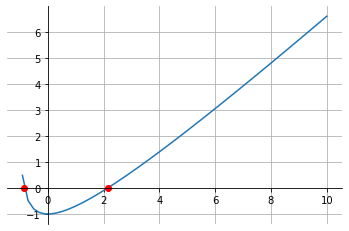

In [177]:
from sympy import symbols
x=np.linspace(-10,10,100)
r=-1
x_dot= r+x-np.log(1+x)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

#plt.axis([-5, 5, -5, 5])
plt.plot(x,x_dot)
plt.grid()

x=sp.symbols('x')
x_dot1= r+x-sp.log(1+x)
roots=sp.solve(x_dot1)
print(roots)
for j in range(len(roots)):
  plt.plot(roots[j],0,'ro')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


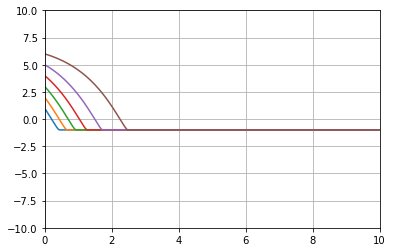

In [178]:
def fun (t,x,r,b):
  return r+x-np.log(1+x)
  #return r*x-x**3
  

r,b=-5,1

ti=0; tf=10; dt=300
tspam=[ti, tf]
t=np.linspace(ti,tf,dt)
for x0 in np.arange(1,7,1):
  sol=solve_ivp(fun,tspam,[x0],args=(r,b),t_eval=t)
  plt.plot(sol.t, sol.y[0])

plt.axis([ti, tf, -10, 10])
plt.grid()

* los valores encuentran un punto de equilibrio por debajo de cero

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


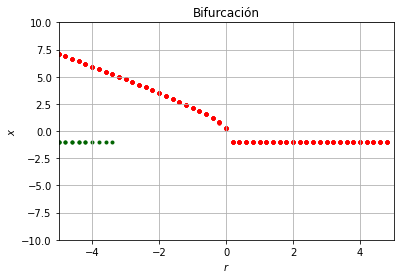

In [179]:
ti=0; tf=10; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(5,10,1):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(1,10,1):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.title('Bifurcación')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
plt.grid()

## 3.1.4) $\dot { x } =r+\frac{1}{2}x-\frac{x}{(1+x)}$

Resolver para $ x $ produce $ x_ {1,2} = \frac {1} {2} -r \pm \sqrt {r ^ {2} -3 r + \frac {1} {4}} $. Como la raíz no es negativa para $ \left | r- \frac {3} {2} \right |> \sqrt {2}, $ los dos puntos fijos dejan de existir dentro de este intervalo. Debido al tipo de función (comportamiento asintótico para $ x \rightarrow \pm \infty $), el punto fijo más alejado de -1 es siempre el punto fijo inestable.

In [ ]:
from sympy import symbols
x=np.linspace(-10,10,100)
r=-1
x_dot= r+(1/2)*x-(x/(1+x))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

#plt.axis([-5, 5, -5, 5])
plt.plot(x,x_dot)
plt.grid()

x=sp.symbols('x')
x_dot1= r+(1/2)*x-(x/(1+x))
roots=sp.solve(x_dot1)
print(roots)
for j in range(len(roots)):
  plt.plot(roots[j],0,'ro')

In [ ]:
def fun (t,x,r,b):
  return r+(1/2)*x-(x/(1+x))
  #return r*x-x**3
  

r,b=-2,1

ti=0; tf=10; dt=100
tspam=[ti, tf]
t=np.linspace(ti,tf,dt)
for x0 in np.arange(0,7,0.2):
  sol=solve_ivp(fun,tspam,[x0],args=(r,b),t_eval=t)
  plt.plot(sol.t, sol.y[0])

plt.axis([ti, tf, -10, 10])
plt.grid()

In [ ]:
ti=0; tf=1; dt=100
tspam=[ti, tf]

for r in np.arange(-1,5,0.5):
  for x0 in np.arange(2,5,0.5):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-1,5,0.5):
  for x0 in np.arange(2,5,0.5):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.title('Bifurcación')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
plt.grid()

Resolviendo para $x$ rendimientos $x_{1,2}=\frac{1}{2}-r \pm \sqrt{r^{2}-3 r+\frac{1}{4}}$. Como la raíz no es negativa para $\left|r-\frac{3}{2}\right|>\sqrt{2},$ los dos puntos fijos dejan de existir dentro de este intervalo. Debido al tipo de función (comportamiento asintótico para $x \rightarrow \pm \infty$ ), el punto fijo más alejado de -1 es siempre el punto fijo inestable.

# Bifurcación tipo Tridente 

En teoría de la bifurcación , un campo dentro de las matemáticas , una bifurcación tridente es un tipo particular de local de bifurcación donde las transiciones del sistema de un punto fijo a tres puntos fijos. Bifurcación tridente, como bifurcaciones de Hopf tienen dos tipos - supercríticas y subcríticas.

En los sistemas dinámicos continuos descritos por ecuaciones diferenciales ordinarias, este tipo de bifurcaciones ocurren genéricamente en sistemas con simetría .

En el caso general: 

Una ecuación diferencial ordinaria, 

$$\dot{x}=f(x,r)$$ 

descrita por una función uniparamétrica $f(x,r)$ con $r \in R$, satisfaciendo: 

$$-f(x,r)=f(-x,r)$$ 

$$ \frac{\partial f}{\partial x} (0, r_0)=0, \quad \frac{\partial ^2 f}{\partial x^2} (0, r_0)=0, \quad \frac{\partial ^3 f}{\partial x^3} (0, r_0) \neq 0$$ 

$$ \frac{\partial f}{\partial r} (0, r_0)=0, \quad \frac{\partial^2 f}{\partial r \partial x} (0, r_0) \neq 0 $$

tiene una bifurcación de pitchfork en $(x,r)=(0, r_0)$. La forma de la bifurcación es dada por el signo de la tercera derivada. 

$$\frac { \partial ^{ 3 }f }{ \partial x^{ 3 } } =\begin{cases} <0\quad supercrítico \\ >0\quad subcrítico\quad  \end{cases}$$

## 3.2.1) $\dot{x}=rx-x^2$

* Hay dos puntos fijos, descritos por $ x_ {1} = 0 $ y $ x_ {2} = - r. $ Mientras que $ r <0, x_ {1} $ representa el punto fijo estable y $ x_ {2} $ el inestable. En $ r = 0 $ cambian la estabilidad.


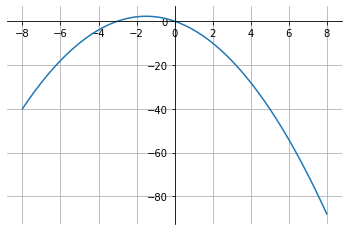

In [180]:
r = -3
x = np.linspace(-8,8)
dx = r*x-x**2

# Dibuja el gráfico auxiliar x vs. xdot

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.plot(x,dx)
plt.grid()
plt.show()

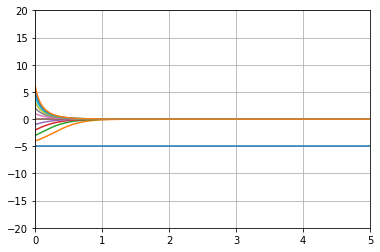

In [181]:
def fun (t,x,r,b): return r*x-x**2

r,b=-5,1

ti=0; tf=5; dt=300
tspam=[ti, tf]
t=np.linspace(ti,tf,dt)
for x0 in np.arange(-5,7,1):
  sol=solve_ivp(fun,tspam,[x0],args=(r,b),t_eval=t)
  plt.plot(sol.t, sol.y[0])

plt.axis([ti, tf, -20, 20])
plt.grid()

* hay un punto de estabilidad en 0

<Figure size 1800x360 with 0 Axes>

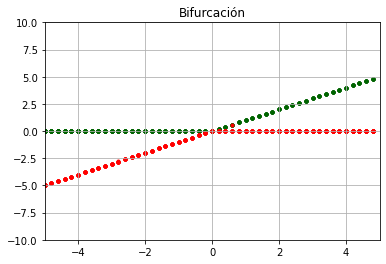

<Figure size 1800x360 with 0 Axes>

In [182]:
ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')

plt.axis([-5, 5, -10, 10])
plt.grid()
plt.title('Bifurcación')
plt.axis([-5,5,-10,10])
plt.figure(figsize=(20,4),dpi=90)

* Todos excepto abajo a la derecha: espacio de fase de $ \dot {x} = $ $ r x + x ^ {2}, $ arriba a la izquierda: $ r = -2, $ arriba a la derecha: $ r = 0 $ abajo a la izquierda: $ r = 2, $ abajo a la derecha: diagrama de bifurcación de $ \dot {x} = r x + x ^ {2} $

## 3.2.2) $\dot{x}=r*x-ln(1+x)$

* Aquí, un punto fijo se mueve a lo largo de $ x_{1} = 0. $ Es estable mientras $ r <1. $ En $ r = 1 $ aparece un segundo punto fijo en $ x = \infty $ cambia su estabilidad de inestable a estable en $ r = 1. $ Aquí, $ \dot {x} $ no se puede transformar en $ x = f (r), $ entonces $ r = \frac {\ln (1 + x)} {x} $ es utilizado para describir el comportamiento. Los puntos fijos estables se acercan a $ x = -1 $ como $ r \rightarrow \infty $
* Todos excepto el centro inferior: espacio de fase de $ \dot {x} = $ $ r x- \ln (1 + x), $ arriba a la izquierda: $ r = 0, $ arriba a la derecha: $ r = $ $ 0.5, $ medio a la izquierda : $ r = 1, $ medio a la derecha: $ r = 1.5 $ centro inferior: diagrama de bifurcación de $ \dot {x} = $ $ r x- \ln (1 + x) $

[0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


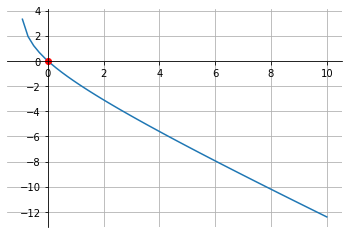

In [186]:
from sympy import symbols
x=np.linspace(-10,10,100)
r=-1
x_dot= r*x-np.log(1+x)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

#plt.axis([-5, 5, -5, 5])
plt.plot(x,x_dot)
plt.grid()

x=sp.symbols('x')
x_dot1= r*x-sp.log(1+x)
roots=sp.solve(x_dot1)
print(roots)
for j in range(len(roots)):
  plt.plot(roots[j],0,'ro')

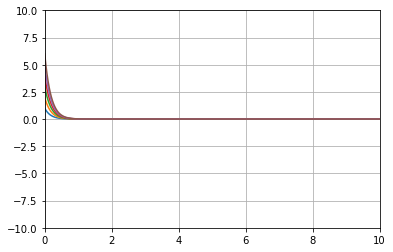

In [187]:
def fun (t,x,r,b):
  return r*x-np.log(1+x)
  #return r*x-x**3
  

r,b=-5,1

ti=0; tf=10; dt=300
tspam=[ti, tf]
t=np.linspace(ti,tf,dt)
for x0 in np.arange(1,7,1):
  sol=solve_ivp(fun,tspam,[x0],args=(r,b),t_eval=t)
  plt.plot(sol.t, sol.y[0])

plt.axis([ti, tf, -10, 10])
plt.grid()

* hay un punto de estabilidad en 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


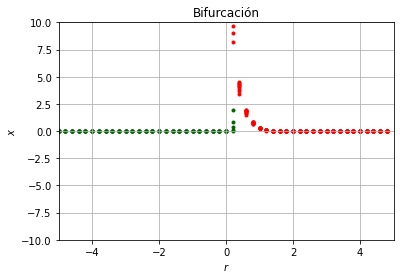

In [188]:
ti=0; tf=10; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(5,10,1):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(1,10,1):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.title('Bifurcación')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
plt.grid()

## 3.2.3) $\dot{x}=x-rx(1-x)$

* Existen dos puntos fijos y estabilidad de intercambio en $ r = 1. $ Por lo tanto, $ x_{1} = 0 $ es estable para $ x <1 $ y $ x_{2} = \frac {r-1} {r} $ para $ x> 0. $ Como puede verse, $ x_{2} \rightarrow \infty $ as $ r \rightarrow 0 $ y $ x_{2} $ proviene de $ - \infty $ para $ r> 0, $ lo que produce una apariencia diferente de los puntos fijos alrededor de cero. Como $ | r | \rightarrow \infty, x_{1} = 0 $ y $ x_{2} \rightarrow 1 $


[0, 2]


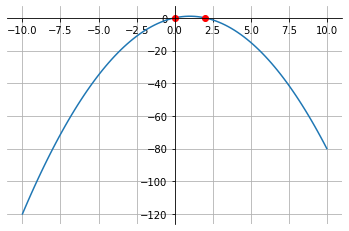

In [189]:
from sympy import symbols
x=np.linspace(-10,10,100)
r=-1
x_dot= x-r*x*(1-x)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

#plt.axis([-5, 5, -5, 5])
plt.plot(x,x_dot)
plt.grid()

x=sp.symbols('x')
x_dot1= x-r*x*(1-x)
roots=sp.solve(x_dot1)
print(roots)
for j in range(len(roots)):
  plt.plot(roots[j],0,'ro')

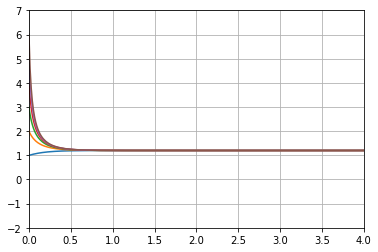

In [193]:
def fun (t,x,r,b):
  return x-r*x*(1-x)
  #return r*x-x**3
  

r,b=-5,1

ti=0; tf=4; dt=300
tspam=[ti, tf]
t=np.linspace(ti,tf,dt)
for x0 in np.arange(1,7,1):
  sol=solve_ivp(fun,tspam,[x0],args=(r,b),t_eval=t)
  plt.plot(sol.t, sol.y[0])

plt.axis([ti, tf, -2, 7])
plt.grid()

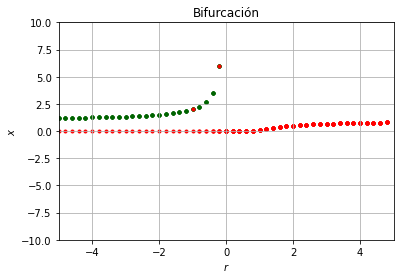

In [191]:
ti=0; tf=10; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(5,10,1):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(1,10,1):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.title('Bifurcación')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
plt.grid()

* Todos excepto abajo a la derecha: espacio de fase de $ \dot {x} = $ $ x-r x (1-x), $ arriba a la izquierda: $ r = -1, $ arriba a la derecha: $ r = $ $ 0, $ medio a la izquierda: $ r = 0.5, $ medio a la derecha: $ r = 1 $ abajo a la izquierda: $ r = 1.5, $ abajo a la derecha: diagrama de bifurcación de $ \dot {x} = xr x (1-x) $